# Сеть

Структура занятия:

1) Основы

2) Низкоуровневая поддержка

3) Высокоуровневая поддержка

4) Парсинг данных bs, lxml, xpath

5) Регулярные выражения



## Основы

Сети позволяют компьютерным программам, выполняемым на разных машинах, взаимодействовать друг с другом.

Возможные схемы взаимодействия сетевых программ:
- точка-точка: одна и та же программа выполняется на разных машинах
- клиент/сервер: программы-клиенты отправляют запросы программе-серверу

Взаимодействие между компьютерами осуществляется путем передачи пакетов данных через сеть, сама передача придерживаться определенного стандарта, называемого протоколом передачи данных.

Самым широко распространенным набором сетевых протоколов передачи данных является стек протоколов TCP/IP. Сегодня этот стек насчитывает 4 фактических уровня. Что касается 7-уровневой модели OSI, протокол IP относится к сетевому уровню, а TCP - к транспортному и сеансовому

На транспортном уровне может использоваться один из двух протоколов:
1) TCP - протокол с предварительным установлением соединения и контролем целостности данных.
2) UDP - протокол передачи без установления соединения.

Взаимодействие по сети происходит не абстрактно между компьютерами, а между конкретными программами, которые должны точно знать, как им обращаться. Такое взаимодействие возможно с помощью сокетов.

**Сокет** - это один конец двустороннего канала связи между двумя программами, работающими в сети.

Сокеты бывают 2-х типов:
1) Потоковые. Сокеты с установленным соединением (базируются на протоколе TCP). Состоят из потока байтов, который может быть двунаправленным - приложение может и передавать, и получать данные.

2) Дейтаграммные. Сокеты, не требующие установления явного соединения между ними (базируются на протоколе UDP). Сообщение отправляется указанному сокету и, соответственно, может получаться от указанного сокета.

Сокет состоит из IP-адреса и порта.
IP-адрес - уникальный сетевой адрес узла в компьютерной сети, построенной по протоколу IP.
Порт - натуральное число, записываемое в заголовках протоколов транспортного уровня (TCP, UDP и др.). За определенными службами номера портов зарезервированы - это широко известные номера портов, например, порт 80, использующийся в протоколе HTTP. Любое приложение может пользоваться любым номером порта, который не был зарезервирован и пока не занят.

Поскольку IP-адрес уникален в пределах сети, а номера портов уникальны на отдельной машине, номера сокетов также уникальны во всей сети (в т.ч. сети Интернет). Эта характеристика позволяет процессу общаться через сеть с другим процессом исключительно на основании номера сокета.

Пример сокета:

`192.168.1.1:8888`

### Прикладной уровень

Большинство приложений работает на прикладном уровне стека TCP/IP и используют свои протоколы. Некоторые примеры:
- HTTP - используется для пересылки произвольных данных
- HTTPS - расширяет возможности HTTP шифрованием
- FTP - для обмена фалами и бинарными данными
- SMTP - для передачи электронной почты
- POP - для получения почты с удалённого сервера
- IMAP - для манипуляции письмами на почтовом сервере
- TELNET - для удалённого доступа к узлу (хосту)

Более подробно оснановимся на рассмотрении HTTP. Ключевые моменты:
- URI (Uniform Resource Identifier) - унифицированный идентификатор ресурса
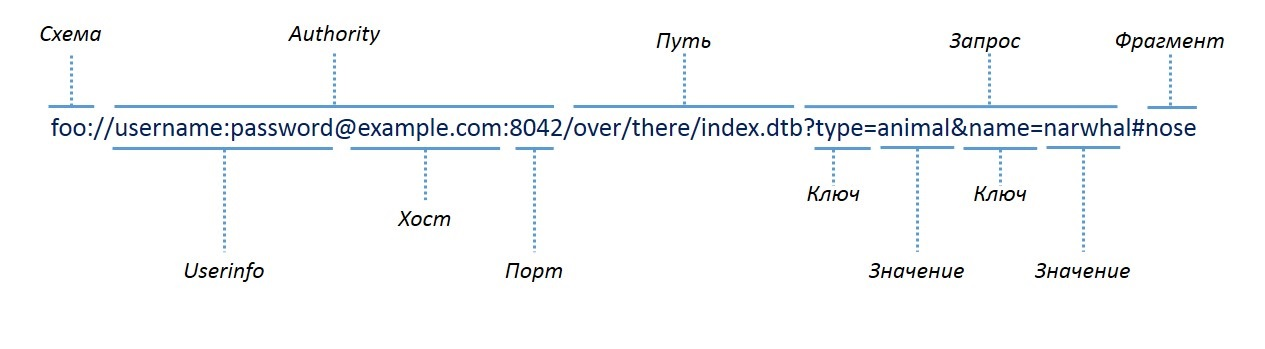

- HTTP-запрос и ответ состоят из 4 частей
    1. Стартовая строка (англ. Starting Line) — определяет тип сообщения (обязательна). Для запроса состоит из глагола (метода HTTP), пути и версии протокола, например `GET /path/to/file/index.html HTTP/1.0`. Для ответа - версию, код ответа и расшифровку кода - `HTTP/1.0 200 OK`
    2. Заголовки (англ. Headers) — характеризуют тело сообщения, параметры передачи и прочие сведения;
    3. Пустая строка;
    4. Тело сообщения (англ. Message Body) — непосредственно данные сообщения (например, json-ответ API, код HTML-страницы или файл).
    
- Для управления состоянием (авторизован / нет, мобильный клиент / десктопный), обычно используются Куки. Куки передаются в заголовках. 

- HTML - основной «язык общения» по HTTP-протоколу. Является языком разметки

- API (англ. Application Programming Interface, интерфейс программирования приложений) - набор готовых классов, процедур, функций, структур и констант, предоставляемых приложением (сервисом) для использования во внешних программных продуктах. API обычно позволяют обмениваться сообщениями в формате json или xml, являются альтернативой HTML

## Низкоуровневая поддержка. Сокеты

Работа с сокетами реализуется в Python низкоуровневым модулем `socket`

Основные методы объекта `socket`:
- `socket.accept()` - Принимает соединение и блокирует приложение в ожидании сообщение от клиента.
- `socket.bind(address)` - Привязывает сокет к адресу `address`
- `socket.close()` - Закрывает сокет
- `socket.connect(address)` - Подключается к удалённому сокету
- `socket.listen([backlog])` - Позволяет серверу получать соединения
- `socket.recv(bufsize[, flags])` - Читает и возвращает данные в двоичном формате (набор байтов) из сокета.
- `socket.send(bytes[, flags])` - Отправляет данные клиенту и возвращает количество отправленных байт.

Простой пример

Сервер:
```python
import socket

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # создаем сокет
sock.bind(('', 55000))  # связываем сокет с портом, где он будет ожидать сообщения
sock.listen(10)  # указываем сколько может сокет принимать соединений
print('Server is running, please, press ctrl+c to stop')
while True:
    conn, addr = sock.accept()  # начинаем принимать соединения
    print('connected:', addr)  # выводим информацию о подключении
    data = conn.recv(1024)  # принимаем данные от клиента, по 1024 байт
    print(str(data))
    conn.send(data.upper())  # в ответ клиенту отправляем сообщение в верхнем регистре
conn.close()  # закрываем соединение
```

Клиент:
```python
import socket

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # создаем сокет
sock.connect(('localhost', 55000))  # подключемся к серверному сокету
sock.send(bytes('Hello, world', encoding = 'UTF-8'))  # отправляем сообщение
data = sock.recv(1024)  # читаем ответ от серверного сокета
sock.close()  # закрываем соединение
print(data)
```

## Высокоуровневая поддержка. HTTP

Для работы с HTTP/HTTPS одной из наиболее функциональных является библиотека `requests`

Для установки...

In [ ]:
pip install requests

Основные методы:
- `requests.request(method, url, **kwargs)` - Выполняет HTTP-запрос. 
- `requests.get(url, params=None, **kwargs)` - Отправляет GET-запрос.
- `requests.post(url, data=None, json=None, **kwargs)` - Отправляет POST-запрос.

`method` - метод http (GET, POST, PUT, PATCH, UPDATE, ...)

`params` - параметры запроса 

`data` - тело запроса (несериализованное)

`json` - тело запроса в формате json

`kwargs` - допонительные аргументы
    - `headers` - заголовки запроса
    - `params` - параметры запроса 
    - `timeout` - таймаут
    - `proxies` - прокси-сервер
    - `cert` - ssl параметры
    
Все ответы инкапсулируются в объекты типа [requests.Response](https://docs.python-requests.org/en/latest/api/#requests.Response)
Основные методы/свойства requests.Response:
- `.text` - получить ответ в формате unicode
- `.json()` - получить ответ в формате json 
- `.close()` - освободить соединение
- `.status_code` - получить код ответа

In [ ]:
import requests

# w = '%D0%90%D1%80%D1%85%D0%B0%D0%BD%D0%B3%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C'
w = 'Архангельская_область'
resp = requests.get(f'https://ru.wikipedia.org/api/rest_v1/page/summary/{w}')
resp.json()

Внимание! При создании каждого соединения, мы занимаем 1 сокет

### Высокоуровневая поддержка. Другие протоколы

SMTP - `smtplib`

POP - `poplib`

IMAP - `imaplib`

## Парсинг данных bs, lxml, xpath

In [ ]:
request = 'https://en.wikipedia.org/wiki/Arkhangelsk'

html = requests.get(request).text

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#) - библиотека для работы с XML, HTML

In [ ]:
pip install --upgrade pip

In [ ]:
pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.title

In [ ]:
soup.title.text

In [ ]:
soup.title.parent

In [ ]:
soup.find_all('a')

In [ ]:
soup.find(class_="image")

[lxml](https://lxml.de/xpathxslt.html) - другая библиотека для работы с html/xml

In [ ]:
pip install lxml

In [ ]:
from lxml import html as ht
tree = ht.fromstring(html)

In [ ]:
tree.xpath(".//a/text()")

In [ ]:
tree.xpath(".//a/@href")

## Регулярные выражения

Инструмент для тестирования / изучения регулярных выражений - https://regex101.com/

## Особенности работы с сетью

Сеть является нестабильным источником

1. Со стороны сервера
    - для того чтобы ограничить число одновременных соединений: таймаут на соединения; тротлить соединения (отбрасывать часть); gracefull degradation, то есть мы будем отдавать частичный ответ
    - допускать только ожидаемых клиентов - ограничения по регионам (настройка сети)

2. Со стороны клиента
    - для того чтобы не висеть - выставить таймаут соединения
    - если удалённый сервис временно недоступен - повторить запрос (https://pypi.org/project/backoff/)
    - для того чтобы не нагружать удалённый сервис (сервер) - лимитировать запросы по времени - ratelimiter (https://pypi.org/project/ratelimiter/)

### Использованная литература:

- https://www.yuripetrov.ru/edu/python/ch_13_01.html
- https://docs.python.org/3/library/ipc.html
- https://docs.python.org/3/library/internet.html